In [43]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
from sklearn.model_selection import train_test_split 

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/global-internet-usage-by-country-2000-2023/internet_usage.csv


In [44]:
df = pd.read_csv('/kaggle/input/global-internet-usage-by-country-2000-2023/internet_usage.csv')

In [45]:
df

,Country Name,Country Code,2000,2001,2002,2003,2004,2005,2006,2007,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,Afghanistan,AFG,..,0.00472257,0.0045614,0.0878913,0.105809,1.22415,2.10712,1.9,...,7,8.26,11,13.5,16.8,17.6,18.4,..,..,..
1,Albania,ALB,0.114097,0.325798,0.390081,0.9719,2.42039,6.04389,9.60999,15.0361,...,54.3,56.9,59.6,62.4,65.4,68.5504,72.2377,79.3237,82.6137,83.1356
2,Algeria,DZA,0.491706,0.646114,1.59164,2.19536,4.63448,5.84394,7.37598,9.45119,...,29.5,38.2,42.9455,47.6911,49.0385,58.9776,60.6534,66.2356,71.2432,..
3,American Samoa,ASM,..,..,..,..,..,..,..,..,...,..,..,..,..,..,..,..,..,..,..
4,Andorra,AND,10.5388,..,11.2605,13.5464,26.838,37.6058,48.9368,70.87,...,86.1,87.9,89.7,91.5675,..,90.7187,93.2056,93.8975,94.4855,..
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212,Virgin Islands (U.S.),VIR,13.8151,18.3758,27.4944,27.4291,27.377,27.3443,27.3326,27.3393,...,50.07,54.8391,59.6083,64.3775,..,..,..,..,..,..
213,West Bank and Gaza,PSE,1.11131,1.83685,3.10009,4.13062,4.4009,16.005,18.41,21.176,...,53.6652,56.7,59.9,63.3,64.4,70.6226,76.01,81.83,88.6469,86.6377
214,"Yemen, Rep.",YEM,0.0825004,0.0908025,0.518796,0.604734,0.881223,1.0486,1.24782,5.01,...,22.55,24.0854,24.5792,26.7184,..,..,13.8152,14.8881,17.6948,..
215,Zambia,ZMB,0.191072,0.23313,0.477751,0.980483,1.1,1.3,1.6,1.9,...,6.5,8.8,10.3,12.2,14.3,18.7,24.4992,26.9505,31.2342,..


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217 entries, 0 to 216
Data columns (total 26 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Country Name  217 non-null    object
 1   Country Code  217 non-null    object
 2   2000          217 non-null    object
 3   2001          217 non-null    object
 4   2002          217 non-null    object
 5   2003          217 non-null    object
 6   2004          217 non-null    object
 7   2005          217 non-null    object
 8   2006          217 non-null    object
 9   2007          217 non-null    object
 10  2008          217 non-null    object
 11  2009          217 non-null    object
 12  2010          217 non-null    object
 13  2011          217 non-null    object
 14  2012          217 non-null    object
 15  2013          217 non-null    object
 16  2014          217 non-null    object
 17  2015          217 non-null    object
 18  2016          217 non-null    object
 19  2017    

In [47]:
df.head()

,Country Name,Country Code,2000,2001,2002,2003,2004,2005,2006,2007,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,Afghanistan,AFG,..,0.00472257,0.0045614,0.0878913,0.105809,1.22415,2.10712,1.9,...,7,8.26,11,13.5,16.8,17.6,18.4,..,..,..
1,Albania,ALB,0.114097,0.325798,0.390081,0.9719,2.42039,6.04389,9.60999,15.0361,...,54.3,56.9,59.6,62.4,65.4,68.5504,72.2377,79.3237,82.6137,83.1356
2,Algeria,DZA,0.491706,0.646114,1.59164,2.19536,4.63448,5.84394,7.37598,9.45119,...,29.5,38.2,42.9455,47.6911,49.0385,58.9776,60.6534,66.2356,71.2432,..
3,American Samoa,ASM,..,..,..,..,..,..,..,..,...,..,..,..,..,..,..,..,..,..,..
4,Andorra,AND,10.5388,..,11.2605,13.5464,26.838,37.6058,48.9368,70.87,...,86.1,87.9,89.7,91.5675,..,90.7187,93.2056,93.8975,94.4855,..


In [48]:
df.shape

(217, 26)

In [49]:
df.isnull().sum()

Country Name    0
Country Code    0
2000            0
2001            0
2002            0
2003            0
2004            0
2005            0
2006            0
2007            0
2008            0
2009            0
2010            0
2011            0
2012            0
2013            0
2014            0
2015            0
2016            0
2017            0
2018            0
2019            0
2020            0
2021            0
2022            0
2023            0
dtype: int64

In [50]:
#split into train and testnet


trainset, testset = train_test_split(df, test_size=0.2, random_state=7)

In [51]:
trainset

,Country Name,Country Code,2000,2001,2002,2003,2004,2005,2006,2007,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
125,Mauritania,MRT,0.192031,0.261449,0.363229,0.424005,0.48147,0.669966,0.979661,1.43361,...,11.8,17.6,24.1,24.2,35.1,42.3207,41.0726,43.7936,44.3616,..
202,Uganda,UGA,0.163714,0.237945,0.384094,0.46485,0.719971,1.74221,2.52936,3.67197,...,5.4,5.8,5.9,5.9,6,6.01781509,7.4,10,..,..
66,Fiji,FJI,1.49685,1.85798,6.15265,6.72543,7.41294,8.45364,9.60004,10.8978,...,37.4,42.5,49.42,65.78,68.9,77.1867,83.0267,81.9,85.2199,..
200,Turks and Caicos Islands,TCA,..,..,..,..,..,..,..,..,...,..,..,..,..,..,..,..,..,..,..
14,Bahrain,BHR,6.15373,15.0386,18.0507,21.5549,21.4587,21.3037,28.244,32.91,...,90.5031,93.4783,98,95.8781,98.6447,99.7015,99.671,100,100,100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211,Viet Nam,VNM,0.254248,1.26565,1.855,3.78028,7.64241,12.7399,17.2546,20.7554,...,41,45,53,58.14,69.8479,68.6616,70.3,74.21,78.59,78.08
67,Finland,FIN,37.2485,43.1054,62.43,69.22,72.39,74.48,79.66,80.78,...,86.5304,86.4221,87.7036,87.4689,88.89,89.6074,92.1703,92.8081,92.9888,93.5139
25,Botswana,BWA,2.90267,3.43089,3.38592,3.34519,3.30489,3.26255,4.28993,5.28,...,36.7447,37.3121,39.363,41.4138,58,64.8263,67.4756,75.2388,77.3272,..
196,Trinidad and Tobago,TTO,7.72141,15.3846,21.9987,25.9718,27.0243,28.9767,30.0037,32.3,...,62.4,65.1,67.8,70.6,72.8,75,77.2813,79,79.9843,..


In [52]:
trainset.shape

(173, 26)

In [53]:
testset.shape

(44, 26)

In [56]:
print('the trainset has {} observation'.format(trainset.shape))
print('\n') 
print ('the  testset has {} observation'.format(testset.shape))

the trainset has (173, 26) observation


the  testset has (44, 26) observation


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


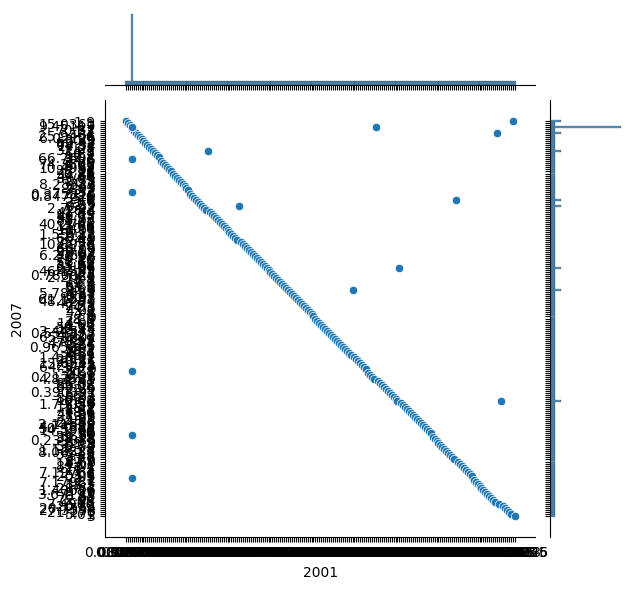

In [66]:
sns.jointplot(x = '2001', y = '2007', data = df)

In [ ]:
sns.scatterplot = (x='Country Name', y = '2007', data = df)